



---

# Session 3. Linear Regression, Logistic Regression and K-Nearest Neighbors (Part 1) 
---



# Principle of Linear Regression (Regression algorithm)

- Linear regression is based on **a linear relationship** between the dependent variable (Y) and the independent variables (X).
- This relationship is represented by a linear equation of the form : 
$$
Y = \beta_0 + \beta_1*X_1 + \beta_2*X_2 + ... + \beta_n*X_n + \varepsilon
$$
Where
- $Y$ is the dependent variable,
- $X_1, X_2, ..., X_n $ are the independent variables,
- $\beta_0, \beta_1, \beta_2, ..., \beta_n $ are the regression coefficients, 
- $\beta_0$ is the interception coefficient :  represents the value of the dependent variable (Y) when the independent variables=0 
- $\beta_1$, $\beta_1$.. slope coefficients
- $\varepsilon $ is the error term. 


##### Importing libraries

In [1]:
# Python library used for manipulating numerical data
import numpy as np

# Python library used for creating visualizations 
import matplotlib.pyplot as plt 

# Python library used for ML algorithms
from sklearn.linear_model import LinearRegression

##### Creation of the training data

In [2]:
# Days
# creates a 1D NumPy array, then reshape it into a 2D Numpy Array (matrix) of form (5, 1) :5 rows and 1 column 
days = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  
# Temperatures
temperatures = np.array([20, 22, 25, 24, 23]) 

##### Linear regression model training

In [3]:
modele_regression = LinearRegression()
#training the algorithm by passing days et temperatures
modele_regression.fit(days, temperatures) 

LinearRegression()

#####  Displaying regression coefficients

In [10]:
print(" The interception coefficient : ", modele_regression.intercept_)
print("The slope coefficients:", modele_regression.coef_)

 The interception coefficient :  20.4
The slope coefficients: [0.8]


##### Make temperature predictions and Display the error term : actual value - predicted value

In [11]:
# predicted values

tempeatures_predicted =modele_regression.predict(days)
print (tempeatures_predicted)

# Actual values - predicted values
errors = temperatures - tempeatures_predicted

print("Error terms:", errors)

[21.2 22.  22.8 23.6 24.4]
Error terms: [-1.2  0.   2.2  0.4 -1.4]


##### Linear regression display

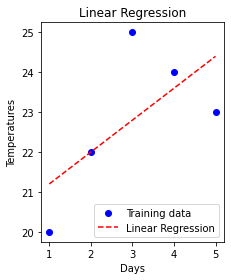

In [12]:
# We draw a linear regression with days on the x-axis and temperatures on the y-axis 
# blue dots represent training data 

plt.subplot(1, 2, 2)
plt.scatter(days, temperatures, color='blue', label='Training data')
plt.plot(days, modele_regression.predict(days), color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Days')
plt.ylabel('Temperatures')
plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Principle of Logistic Regression (classification algorithm)

- Logistic regression is used to model the relationship between a **dependent variable (Y)** and **independent** variables.
- Unlike linear regression, logistic regression models **the probability of Y being in a certain class** (instead of predicting a continuous value as in linear regression).
- The logistic regression equation is based on the logistic (or sigmoid) function, which transforms a linear value into a probability between 0 and 1.

$$P(Y=1|X) = 1 / (1 + e^{-(β₀ + β₁*X₁ + β₂*X₂ + ... + βₙ*Xₙ)}) $$
   


#### Example: Predicting temperature class by day

##### Importing libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

##### Creating model training data

In [15]:
# Creating an example of days and also creating the corresponding temperatures 
# Days
days = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  #creates a NumPy array, then remodels it into a matrix of form (5, 1) :5 rows and 1 column 

# Temperatures
temperatures = np.array([20, 22, 25, 24, 23]) 

##### Creating temperature classes based on a threshold and training the logistic regression model 

In [18]:
'''Define a threshold and transform temperatures into classes. 
If the temperature is greater than a threshold, then the temperature is high (class 1) 
and if the temperature is less then it is low (class 0). '''

threshold = 22
temperature_classes = np.where(temperatures > threshold, 1, 0)

#Define and train our model
regression_logistique = LogisticRegression()
regression_logistique.fit(days, temperature_classes)

LogisticRegression()

##### Display of temperature classes and probabilities of the "high" class with the logistic regression model 

In [19]:
# high class labelled 1
# low class labelled 0 
#for the example of days defined above, we predict the probabilities of the high class (P(Y=1))

probabilites_logistic= regression_logistique.predict_proba(days)[:, 1]
print (days)
print(temperature_classes)
print (probabilites_logistic)

#If probability >=0.5 then class is high otherwise class is low
for i in range (5):
    if probabilites_logistic [i] >= 0.5:
        print("For the day",i+1," the predicted temperature class is 'high'.")
    else:
        print("For the day",i+1,"the predicted temperature class is 'low'.")  

[[1]
 [2]
 [3]
 [4]
 [5]]
[0 0 1 1 1]
[0.18440259 0.39178023 0.64728563 0.83944352 0.93708903]
For the day 1 the predicted temperature class is 'low'.
For the day 2 the predicted temperature class is 'low'.
For the day 3  the predicted temperature class is 'high'.
For the day 4  the predicted temperature class is 'high'.
For the day 5  the predicted temperature class is 'high'.


##### Display of temperature classes and probabilities of the "high" class with the logistic regression model 

In [20]:
#for the example of days defined above, we predict the probabilities of the low class (P(Y=0))

probabilites_logistic= regression_logistique.predict_proba(days)[:, 0]
print (days)
print(temperature_classes)
print (probabilites_logistic)

#If probability >=0.5 then class is high otherwise class is low
for i in range (5):
    if probabilites_logistic [i] >= 0.5:
        print("For the day",i+1," the predicted temperature class is 'low'.")
    else:
        print("For the day",i+1,"the predicted temperature class is 'high'.") 

[[1]
 [2]
 [3]
 [4]
 [5]]
[0 0 1 1 1]
[0.81559741 0.60821977 0.35271437 0.16055648 0.06291097]
For the day 1  the predicted temperature class is 'low'.
For the day 2  the predicted temperature class is 'low'.
For the day 3 the predicted temperature class is 'high'.
For the day 4 the predicted temperature class is 'high'.
For the day 5 the predicted temperature class is 'high'.


##### Results display

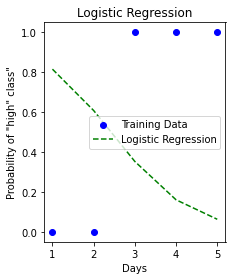

In [21]:
# We draw a logistic regression with days on the x-axis and the Probability of "high" class on the y-axis 
# blue dots represent training data 

plt.subplot(1, 2, 2)
plt.scatter(days, temperature_classes, color='blue', label='Training Data')
plt.plot(days, probabilites_logistic, color='green', linestyle='--', label='Logistic Regression')
plt.xlabel('Days')
plt.ylabel('Probability of "high" class"')
plt.title('Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

##### Make temperature predictions

In [22]:
# We predict the temperatures for these days, for example 

day_prediction = np.array([50, 0, 100, 2]).reshape(-1, 1) 

# Prediction of "high" class probability (P(Y=1))
probabilite_prediction = regression_logistique.predict_proba(day_prediction)[:, 1]

print("Probability of 'high' class:", probabilite_prediction)

for i in range (4):
    if probabilite_prediction [i]>= 0.5:
        print("The predicted temperature class is 'high'.")
    else:
        print("The predicted temperature class is 'low'.")  


Probability of 'high' class: [1.         0.07352485 1.         0.39178023]
The predicted temperature class is 'high'.
The predicted temperature class is 'low'.
The predicted temperature class is 'high'.
The predicted temperature class is 'low'.



# KNN principle (classification and regression algorithm)

##### KNN can be used for classification and regression

a) **Calculating distances**  :
For each point in the dataset, the distance between that point and the query point (for which we want to predict the class) is calculated. The distance can be measured in various metrics, such as Euclidean distance, Manhattan distance, etc.


b)**Selection of nearest neighbors** :
The k points closest to the query point are selected according to their distance. These points are called nearest neighbors.


c) 
**For classification** Majority vote for classification:
The most frequent class among the k neighbors is assigned to the query point. That is, each neighbor "votes" for its respective class, and the class with the highest number of votes is chosen as the prediction.


**For regression** The Mean (median):
the predicted value for the question mark is the mean (or median) of the target values of the k nearest neighbors.

#### Example manually 

- Temperature classes: [low, low, high, high, high].
- Prediction of the temperature of the day 6: 
            - Step 0. Choosing the hyperparameter k=3
            - Step1. Distance calculation
               - Calculate distance (6,5)=1 
               - Calculate distance (6,4)=2 
               - Calculate distance (6,3)=3 
               - Calculate distance (6,2)=4
               - Calculate distance (6,1)=5
            - Step2. Majority vote 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# KNN model creation and training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(days, temperature_classes)

day_prediction = np.array([6, 0, 100, 2]).reshape(-1, 1) 
classe_prediction = knn.predict(day_prediction)[:]

print(classe_prediction)
for i in range (4):
    if classe_prediction [i] == 1:
        print("For the day",i," the predicted temperature class is 'high'.")
    else:
        print("For the day",i,"the predicted temperature class is 'low'.")    


[1 0 1 0]
For the day 0  the predicted temperature class is 'high'.
For the day 1 the predicted temperature class is 'low'.
For the day 2  the predicted temperature class is 'high'.
For the day 3 the predicted temperature class is 'low'.


#### Exercice 

The exercise involves using the k-nearest neighbors (k-NN) algorithm to classify a new instance called X6. To do this, we use a training dataset that contains multiple instances with values for different numerical attributes (A1 to A5) as well as their respective classes.

Here are the detailed steps of the exercise:

- Training Dataset: We have a dataset that contains several instances (X1 to X5), each characterized by its values for the numerical attributes A1 to A5, along with their respective classes.

| Instance | A1 | A2 | A3 | A4 | A5 | Class |
|----------|----|----|----|----|----|-------|
| X1       | 3  | 5  | 4  | 6  | 1  | 1     |
| X2       | 4  | 6  | 10 | 3  | 2  | 2     |
| X3       | 8  | 3  | 4  | 2  | 6  | 3     |
| X4       | 2  | 1  | 4  | 3  | 6  | 3     |
| X5       | 2  | 5  | 1  | 4  | 8  | 2     |


- Instance to Classify (X6): 

| Instance | A1 | A2 | A3 | A4 | A5 |
|----------|----|----|----|----|----|
| X6       | 3  | 12 | 4  | 7  | 8  |


In this exercise, you'll have to perform calculations manually using k-NN with k equal to 1 and k equal to 3, based on this training data set and using the eucliden distance 
 $(sqrt((p1 - q1)^2 + (p2 - q2)^2 + ... + (pn - qn)^2))$
